'Unsupervised Matching: DBPediaAuthors_DnbDataAuthors'

Stats about pool data
Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1
Profiling Density


{'birthdate': '0.935',
 'cosine': '1.000',
 'deathdate': '0.544',
 'gender': '0.984',
 'label': '1.000'}

Stats about validation data
Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1


'Training size:'

13863

'Validation size:'

3465

<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Knee of the curve is at index = 12102
Knee value = 0.3926132502959966


'Define Elbow threshold: 0.392613 '

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 12102, 1: 1761}

'Training size:'

13863

'Validation size:'

3465

Method attrelbow_density gives 0.872861 prec, 0.618718 recall and 0.724138 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

'Define static threshold (0.5) and take positive and negative elements'

Threshold defined with static method threshold (0.5): 0.500243
Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 13010, 1: 853}

'Training size:'

13863

'Validation size:'

3465

Method attrstatic_density gives 0.994924 prec, 0.339688 recall and 0.506460 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Find Otsu's threshold: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
Threshold defined with Otsu's method: 0.332890 


"Define Otsu's threshold: 0.332890"

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 10379, 1: 3484}

'Training size:'

13863

'Validation size:'

3465

Method attrotsu_density gives 0.498812 prec, 0.727903 recall and 0.591966 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Find Valley threshold: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
Threshold defined with valley threshold method: 0.375079 


'Define Valley threshold: 0.375079'

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 11760, 1: 2103}

'Training size:'

13863

'Validation size:'

3465

Method attrvalley_density gives 0.776151 prec, 0.642981 recall and 0.703318 f1 if noisy data are used to train a RF


,Dataset,Bootstrap sample correctness,Bootstrap sample f1,Method,Precision,Recall,F1- Random Forest
0,DBPediaAuthors_DnbDataAuthors,-,-,Passive Supervised Learning,0.988,0.965,0.976
1,DBPediaAuthors_DnbDataAuthors,0.918632,0.72285,attrelbow_density,0.873,0.619,0.724
2,DBPediaAuthors_DnbDataAuthors,0.894684,0.538267,attrstatic_density,0.995,0.340,0.506
3,DBPediaAuthors_DnbDataAuthors,0.83373,0.602106,attrotsu_density,0.499,0.728,0.592
4,DBPediaAuthors_DnbDataAuthors,0.906947,0.707616,attrvalley_density,0.776,0.643,0.703


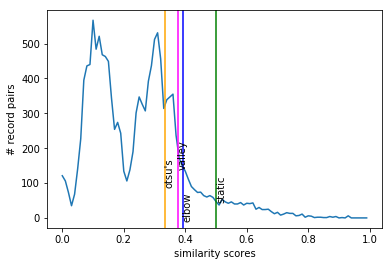

In [6]:
%matplotlib inline
from datautils import*
from IPython.display import Markdown, display
import numpy as np
from preprocessing import*
from learning import*
from bootstrapping import*
from bootstrapping_unsupervised import*
from similarityutils import*
from collections import Counter
import pandas as pd

# run thresholding comparison
thresholding()


In [5]:
#start from here
def thresholding():
   
    #set these parameters   
    bootstrap_methods = ['attrelbow_density','attrstatic_density', 'attrotsu_density','attrvalley_density']
    threshold_labels = ['elbow', 'static', 'otsu\'s', 'valley']
    threshold_colors = ['blue', 'green', 'orange', 'magenta']
    threshold_text = [50, 100, 150, 200]
    thresholds = []
    model = 'rf'
    dataPathmain = "../datasets/author"
    domain = 'author'
    datasets = [ 'DBPediaAuthors_DnbDataAuthors']
        
      
    for dataset in datasets:
        model_ = []
        method_ = []
        precision_=[]
        precision_sigma=[]
        recall_=[]
        recall_sigma=[]
        f1_=[]
        f1_sigma = []
        bootstrap_sample_correctness = []
        bootstrap_sample_f1 = []

        dataset_=[]
        
        #get data and profiling information
        display("Unsupervised Matching: %s" %dataset)
        
        featureFile_train = dataPathmain+'/features_'+dataset+'_train'
        featureFile_test = dataPathmain+'/features_'+dataset+'_test'
        
        print("Stats about pool data")
        trainingData = getLabelledDataFromFile(featureFile_train, rescale=True)
        print("Profiling Density")
        prof_results = dict()
        data_values = trainingData['feature_values']
        tobedropped=[]
        for c in data_values.columns:
            empty_values = len(data_values[data_values[c] == -1])
            per= float(empty_values)/float(len(data_values[c]))
            density = 1-per
           
            #drop non-dense attributes for the wdc datasets
            if 'wdc_product' in domain:
                column_name = c
            else: column_name = c.split("_")[0]
            if (density<0.1):tobedropped.append(c)
            else: prof_results[column_name]= ("%.3f" %density)
        
        if 'wdc_product' in domain:
            print ("Columns to be dropped:", len(tobedropped))
            trainingData['feature_values'] = trainingData['feature_values'].drop(tobedropped, axis=1)
        display(prof_results)
        print("Stats about validation data")
        validationData = getLabelledDataFromFile(featureFile_test, rescale=True)
        if 'wdc_product' in domain:
            validationData['feature_values'] = validationData['feature_values'].drop(tobedropped, axis=1)

        
        X = trainingData['feature_values']
        y = trainingData['labels']
        ids  = trainingData['ids']
        bootstrap_sample_correctness
    
        #get results for supervised matching
        prec, recall, fscore, support = batchTraining(X,y,validationData['feature_values'],validationData['labels'],model, printResults = False,
                                                           optimization=False)
        precision_.append("%.3f" %prec)
        recall_.append("%.3f" %recall)
        f1_.append("%.3f" %fscore)
        model_.append(model)
        
        dataset_.append(dataset)
        method_.append('Passive Supervised Learning')
        bootstrap_sample_correctness.append("-")
        bootstrap_sample_f1.append("-")
        for m in bootstrap_methods:

            bootstrap = BootstrappingUnsupervised(data=X, labels=y, ids=ids, bootstrap_method=m, domain=domain)
            sorted_dataset = bootstrap.sorted_dataset
            thresholds.append(bootstrap.threshold)

            bootstrapping_sample = bootstrap.sample
            bootstrap_sample_correctness.append(bootstrapping_sample['correctness'])
            bootstrap_sample_f1.append(bootstrapping_sample['f1'])

            prec, recall, fscore, support = batchTraining(bootstrapping_sample['data'],bootstrapping_sample['labels'],
                                                          validationData['feature_values'],validationData['labels'],model, printResults = False, optimization=False,
                                                          showMisclassifications = False, ids = ids)

            print("Method %s gives %f prec, %f recall and %f f1 if noisy data are used to train a RF" % (m, prec, recall, fscore))
            
            method_.append(m)
            model_.append(model)
            precision_.append("%.3f" %prec)

            recall_.append("%.3f" %recall)

            f1_.append("%.3f" %fscore)

            dataset_.append(dataset)

        results = list(zip(dataset_ ,bootstrap_sample_correctness, bootstrap_sample_f1,method_,precision_,recall_, f1_))
        df_results = pd.DataFrame(results, columns = ['Dataset',  'Bootstrap sample correctness', 'Bootstrap sample f1','Method', 'Precision', 'Recall','F1- Random Forest']) 
        display(df_results)
        
        simple_hist, _ = np.histogram(sorted_dataset, bins=100, range=(0.0, 1.0))
        plt.plot(np.arange(0.00,1.0,0.01),simple_hist)
        for i in range(len(threshold_colors)):
            plt.axvline(x=thresholds[i], c= threshold_colors[i])
            plt.text(thresholds[i],threshold_text[i],threshold_labels[i],rotation=90)

        plt.xlabel('similarity scores')
        plt.ylabel('# record pairs')
        plt.show()
        